# **Proyecto Final Laboratorio Modelado de Datos**

## **Clasificación**

### **Objetivo**

El problema de clasificación que se ha elegido es el de identificar a que **reino** pertenece cada una de las especies, sin tomar en cuenta el nombre de la especie; dado que esto nos puede dar informacion muy corelacionada con el reino; lo que se busca es que se pueda generar la prediccion solamente usadon información de sus estadísticas de uso de **codones** de ADN y el tipo de ADN al que pertenecen.

### **Contexto**

#### **Codones de ADN**
Los codones son secuencias de tres nucleótidos en el ADN o ARN que codifican un aminoácido específico o una señal de terminación en el proceso de síntesis de proteínas. En el ADN, las bases nitrogenadas son adenina (A), timina (T), guanina (G) y citosina (C), mientras que en el ARN, la timina es reemplazada por uracilo (U). Estas bases se agrupan en tripletes llamados codones.

Por ejemplo:

UUU y UUC codifican el aminoácido fenilalanina.
UAA, UAG y UGA son codones de terminación, señalando el fin de una secuencia proteica.  

Los codones son fundamentales porque determinan cómo se ensamblan los aminoácidos para formar proteínas, que son esenciales para las funciones celulares y el desarrollo de los organismos. Cada organismo tiene su propio "patrón" o "frecuencia" en el uso de codones, lo que puede influir en su eficiencia y adaptabilidad para producir proteínas. Estas diferencias en los patrones de uso de codones pueden ser distintivas entre diferentes reinos biológicos.

#### **Tipos de ADN**
El tipo de ADN hace referencia a la ubicación o tipo específico de material genético dentro de la célula de un organismo. Existen varias categorías, cada una con funciones y características propias:  

Genómico (0): ADN que forma el núcleo de la célula en eucariotas (como animales y plantas) y en los cromosomas en procariotas (como bacterias).  
Mitocondrial (1): ADN encontrado en las mitocondrias, orgánulos celulares responsables de producir energía. Es independiente del ADN nuclear.  
Cloroplasto (2): ADN en los cloroplastos, orgánulos responsables de la fotosíntesis en las plantas.  

Otros tipos menos comunes como cianelas (3) y apicoplastos (11) que están presentes en algunos tipos de algas y parásitos.  
Cada uno de estos tipos de ADN puede tener diferentes funciones y características, lo que permite una clasificación y análisis más detallado en estudios de genética y evolución.

#### **Los Reinos Biológicos**
Los reinos son una de las principales categorías en la clasificación biológica que agrupa a los organismos con características similares en términos de estructura, funciones celulares y genética. Los reinos considerados en este proyecto incluyen:  

Archaea ('arc'): Microorganismos unicelulares que suelen habitar en ambientes extremos. Aunque superficiales, son diferentes de las bacterias en su estructura genética y celular.  

Bacteria ('bct'): Organismos unicelulares procariontes, con una estructura celular simple sin núcleo definido.  

Virus ('vrl') y Bacteriófagos ('phg'): Partículas infecciosas compuestas principalmente de ADN o ARN y una cubierta proteica. Los virus necesitan infectar células para replicarse, y los bacteriófagos son virus que infectan bacterias.  

Plantas ('pln'): Organismos eucariontes multicelulares que realizan fotosíntesis, con ADN en el núcleo y en los cloroplastos. 

Invertebrados ('inv'): Animales sin columna vertebral, como insectos y moluscos.  

Vertebrados ('vrt'): Animales con columna vertebral, incluyendo subgrupos como mamíferos ('mam'), roedores ('rod') y primates ('pri').  

#### **Datos Utilizados**
En este proyecto, se utilizarán los patrones de uso de codones y el tipo de ADN para predecir el reino de una especie sin necesidad de conocer su nombre. Esto es útil, ya que el nombre de la especie podría proporcionar una pista directa sobre el reino, y el objetivo es realizar la clasificación basándose en datos biológicos y genéticos.

La base de datos **CUTG** (Codon Usage Tabulated from GenBank) es una fuente de datos que organiza y clasifica los patrones de uso de codones de diversas especies. Los datos en este proyecto provienen de la base CUTG sin embargo fueron descargados desde **[Kaggle](https://www.kaggle.com/datasets/meetnagadia/condon-usage-dataset/data)** y están organizados de la siguiente manera:  

Código del Reino ('Kingdom'): Cada especie está clasificada con un código de tres letras que representa su reino.  

Tipo de ADN ('DNAtype'): Un valor numérico que indica el tipo de ADN en función de su función y ubicación en la célula (por ejemplo, genómico, mitocondrial, cloroplasto, etc.).  

Frecuencia de Codones ('codon'): Representa la frecuencia de cada codón en la secuencia genética de una especie. Este valor es la cantidad de veces que un codón aparece en relación con el número total de codones en la secuencia, lo que permite normalizar y comparar los datos entre especies.  

Estos datos permitirán entrenar un modelo de clasificación que identifique el reino al que pertenece una especie basándose en su patrón de codones y su tipo de ADN.

### **Importacion de Librerias**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
import numpy as np

### **Lectura de Datos**

In [28]:
df = pd.read_csv("codon_usage.csv", low_memory=False)
df=df.set_index('SpeciesID')

df.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
SpeciesID,,,,,,,,,,,,,,,,,,,,,
100217,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
100220,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
100755,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
100880,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
100887,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


### **Caracteristicas de Datos**

In [29]:
df.shape

(13028, 68)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13028 entries, 100217 to 9606
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   Ncodons      13028 non-null  int64  
 3   SpeciesName  13028 non-null  object 
 4   UUU          13028 non-null  object 
 5   UUC          13028 non-null  object 
 6   UUA          13028 non-null  float64
 7   UUG          13028 non-null  float64
 8   CUU          13028 non-null  float64
 9   CUC          13028 non-null  float64
 10  CUA          13028 non-null  float64
 11  CUG          13028 non-null  float64
 12  AUU          13028 non-null  float64
 13  AUC          13028 non-null  float64
 14  AUA          13028 non-null  float64
 15  AUG          13028 non-null  float64
 16  GUU          13028 non-null  float64
 17  GUC          13028 non-null  float64
 18  GUA          13028 non-null  float64
 19  GUG  

In [31]:
df.isna().sum()

Kingdom        0
DNAtype        0
Ncodons        0
SpeciesName    0
UUU            0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 68, dtype: int64

In [63]:
df.describe()

,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13026.000000,1.302600e+04,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,...,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000
mean,0.367265,7.961776e+04,0.024818,0.023440,0.020637,0.014104,0.017821,0.018287,0.019045,0.018452,...,0.005453,0.009930,0.006423,0.024181,0.021164,0.028291,0.021683,0.001640,0.000590,0.006179
std,0.688764,7.197556e+05,0.017628,0.011598,0.020710,0.009280,0.010587,0.014573,0.024252,0.016578,...,0.006601,0.008574,0.006388,0.013826,0.013039,0.014343,0.015019,0.001785,0.000882,0.010345
min,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.602000e+03,0.013910,0.015380,0.005610,0.007103,0.010890,0.007830,0.005302,0.007180,...,0.001220,0.001690,0.001170,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,2.929000e+03,0.021750,0.021905,0.015260,0.013360,0.016130,0.014560,0.009680,0.012800,...,0.003530,0.009270,0.004545,0.025425,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,9.120000e+03,0.031307,0.029210,0.029495,0.019808,0.022730,0.025110,0.017255,0.024325,...,0.007150,0.015928,0.010250,0.034190,0.027690,0.036800,0.031127,0.002370,0.000830,0.002890
max,12.000000,4.066258e+07,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [59]:
df.describe(include='object')

,Kingdom,SpeciesName
count,13026,13026
unique,11,13014
top,bct,Escherichia coli O157
freq,2919,4


### **Tratamiento de Datos**

In [33]:
from scipy.stats import chi2_contingency
import numpy as np

contingency_table = pd.crosstab(df['SpeciesName'], df['Kingdom'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Coeficiente de correlación de Cramér entre 'SpeciesName' y 'Kingdom': {cramers_v:.2f}")


Coeficiente de correlación de Cramér entre 'SpeciesName' y 'Kingdom': 1.00


Vemos como el coeficiente de Cramér entre 'SpeciesName' y 'Kingdom' es de 1.00, lo que nos confirma que la variable 'SpeciesName' hay que quitarla para evitar que la predicción se guie por esta 

In [34]:
df.iloc[:,4:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13028 entries, 100217 to 9606
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UUU     13028 non-null  object 
 1   UUC     13028 non-null  object 
 2   UUA     13028 non-null  float64
 3   UUG     13028 non-null  float64
 4   CUU     13028 non-null  float64
 5   CUC     13028 non-null  float64
 6   CUA     13028 non-null  float64
 7   CUG     13028 non-null  float64
 8   AUU     13028 non-null  float64
 9   AUC     13028 non-null  float64
 10  AUA     13028 non-null  float64
 11  AUG     13028 non-null  float64
 12  GUU     13028 non-null  float64
 13  GUC     13028 non-null  float64
 14  GUA     13028 non-null  float64
 15  GUG     13028 non-null  float64
 16  GCU     13028 non-null  float64
 17  GCC     13028 non-null  float64
 18  GCA     13028 non-null  float64
 19  GCG     13028 non-null  float64
 20  CCU     13028 non-null  float64
 21  CCC     13028 non-null  float64
 22 

In [35]:
No_convert = {}

for column in df.iloc[:,4:].columns:
    invalid_values = []
    for i, value in enumerate(df[column]):
        try:
            float(value)
        except ValueError:
            invalid_values.append((i, value))
    
    if invalid_values:
        No_convert[column] = invalid_values

for column, values in No_convert.items():
    print(f"Valores no convertibles en la columna '{column}':")
    for idx, val in values:
        print(f"  - Índice {idx}: {val}")

Valores no convertibles en la columna 'UUU':
  - Índice 486: non-B hepatitis virus
  - Índice 5063: 12;I
Valores no convertibles en la columna 'UUC':
  - Índice 5063: -


In [36]:
print("¿'non-B hepatitis virus' está en 'UUU'?")
print('non-B hepatitis virus' in df['UUU'].values)

print("¿'12;I' está en 'UUU'?")
print('12;I' in df['UUU'].values)

print("¿'-' está en 'UUC'?")
print('-' in df['UUC'].values)


¿'non-B hepatitis virus' está en 'UUU'?
True
¿'12;I' está en 'UUU'?
True
¿'-' está en 'UUC'?
True


Al intentar obtener una matriz de correlación de las variables de los codones, notamos que varias de estas están en tipo objeto. Sin embargo, las variables UUU y UUC no se pueden convertir fácilmente. Al investigar qué valores son los que no se podían convertir, encontramos lo siguiente:  

Para UUU: "non-B hepatitis virus", "12;I"  
Para UUC: "-"  

Gracias a un código publicado en **[Kaggle](https://www.kaggle.com/code/kundankumarmandal/condon-uses-prediction-91-accuracy)** que usamo como guía inicial para comprender los datos y dado que es complicado imputar estos valores debido a que los codones son secuencias específicas que no podemos alterar sin información adicional sobre la cadena de ADN o ARN, optamos por reemplazar los valores por nulos, los cuales posteriormente eliminamos.

In [37]:
df['UUU'] = df['UUU'].str.strip().replace(['non-B hepatitis virus', '12;I'], np.nan)
df['UUC'] = df['UUC'].str.strip().replace('-', np.nan)

In [38]:
df.iloc[:,4:].isna().sum()

UUU    2
UUC    1
UUA    0
UUG    0
CUU    0
      ..
GAA    0
GAG    0
UAA    0
UAG    0
UGA    0
Length: 64, dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.iloc[:,4:].isna().sum()

UUU    0
UUC    0
UUA    0
UUG    0
CUU    0
      ..
GAA    0
GAG    0
UAA    0
UAG    0
UGA    0
Length: 64, dtype: int64

In [41]:
for column in df.iloc[:,4:].columns:
    df[column] = df[column].astype('float32')

In [42]:
# df.shape

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13026 entries, 100217 to 9606
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13026 non-null  object 
 1   DNAtype      13026 non-null  int64  
 2   Ncodons      13026 non-null  int64  
 3   SpeciesName  13026 non-null  object 
 4   UUU          13026 non-null  float32
 5   UUC          13026 non-null  float32
 6   UUA          13026 non-null  float32
 7   UUG          13026 non-null  float32
 8   CUU          13026 non-null  float32
 9   CUC          13026 non-null  float32
 10  CUA          13026 non-null  float32
 11  CUG          13026 non-null  float32
 12  AUU          13026 non-null  float32
 13  AUC          13026 non-null  float32
 14  AUA          13026 non-null  float32
 15  AUG          13026 non-null  float32
 16  GUU          13026 non-null  float32
 17  GUC          13026 non-null  float32
 18  GUA          13026 non-null  float32
 19  GUG  

### **Train-Test Split**

In [44]:
X = df.drop(columns = ['Kingdom','SpeciesName'])
y = df['Kingdom']

In [45]:
print(X.shape)
print(y.shape)

(13026, 66)
(13026,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10420, 66)
(10420,)
(2606, 66)
(2606,)


### **Exploracion y Visualizacion de Datos**

In [48]:
df["Kingdom"].value_counts()

Kingdom
bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: count, dtype: int64

In [49]:
def detectar_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

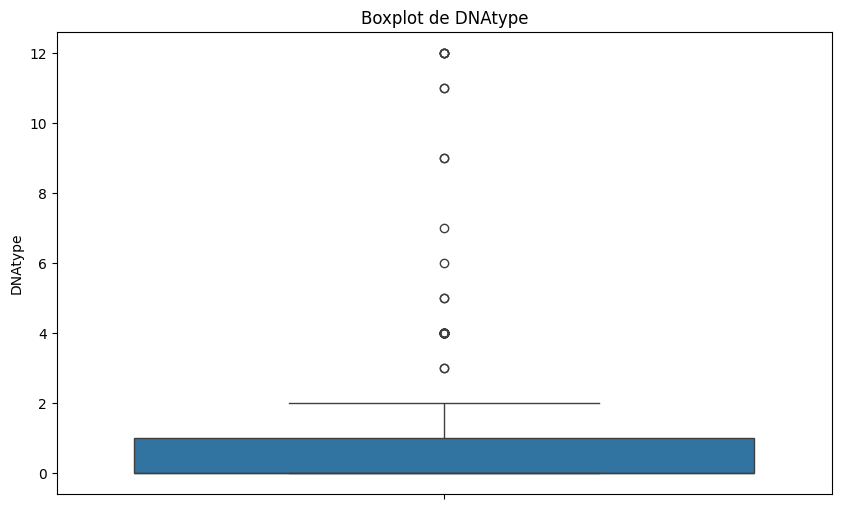

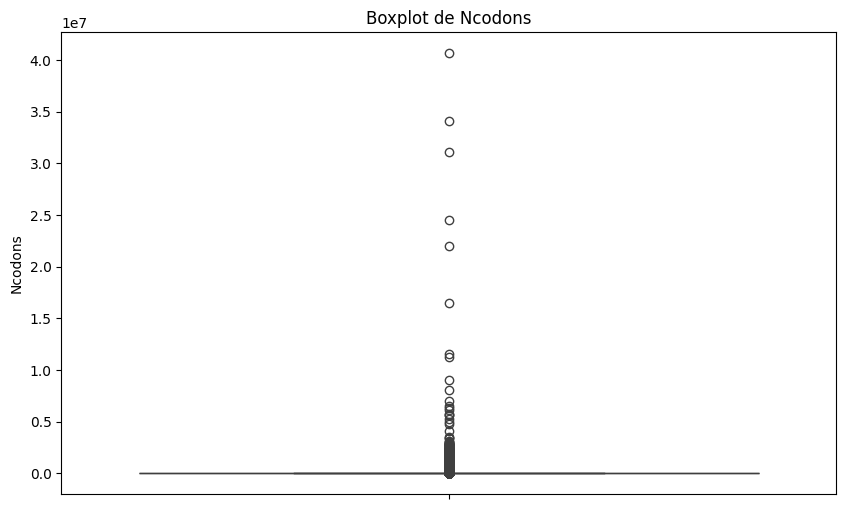

Cantidad de datos atípicos por columna:
{'DNAtype': np.int64(46), 'Ncodons': np.int64(1915)}


In [50]:
outliers_dict = {}

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  
        outliers = detectar_outliers_iqr(df[column])
        outlier_count = outliers.sum()  
        outliers_dict[column] = outlier_count  

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[column])
        plt.title(f'Boxplot de {column}')
        plt.show()

print("Cantidad de datos atípicos por columna:")
print(outliers_dict)

Vemos que solo encontramos datos atípicos en la columna 'DNAtype' y 'Ncodons' sin embargo dado que DNAtype es realmete una variable categórica estos datos atípicos no son válidos en este contexto. Y en el caso de Ncodons, esto podría ser debido a que es una variable que se calcula a partir de la secuencia genética y no es un dato que podría ser erróneo o incorrecto.

In [51]:
# report = sv.analyze(df)
# report.show_notebook()

In [52]:
# import matplotlib.pyplot as plt
# plt.figure(figsize = (20, 25))
# plotnumber = 1
# for column in X:
#     if plotnumber <= 66:
#         ax = plt.subplot(22, 3, plotnumber)
#         sns.displot(X[column])
#         plt.xlabel(column, fontsize = 15)
        
#     plotnumber += 1
# plt.show()

C:\Users\esteb\AppData\Local\Temp\ipykernel_8652\891358711.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\esteb\.conda\envs\ITESO\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


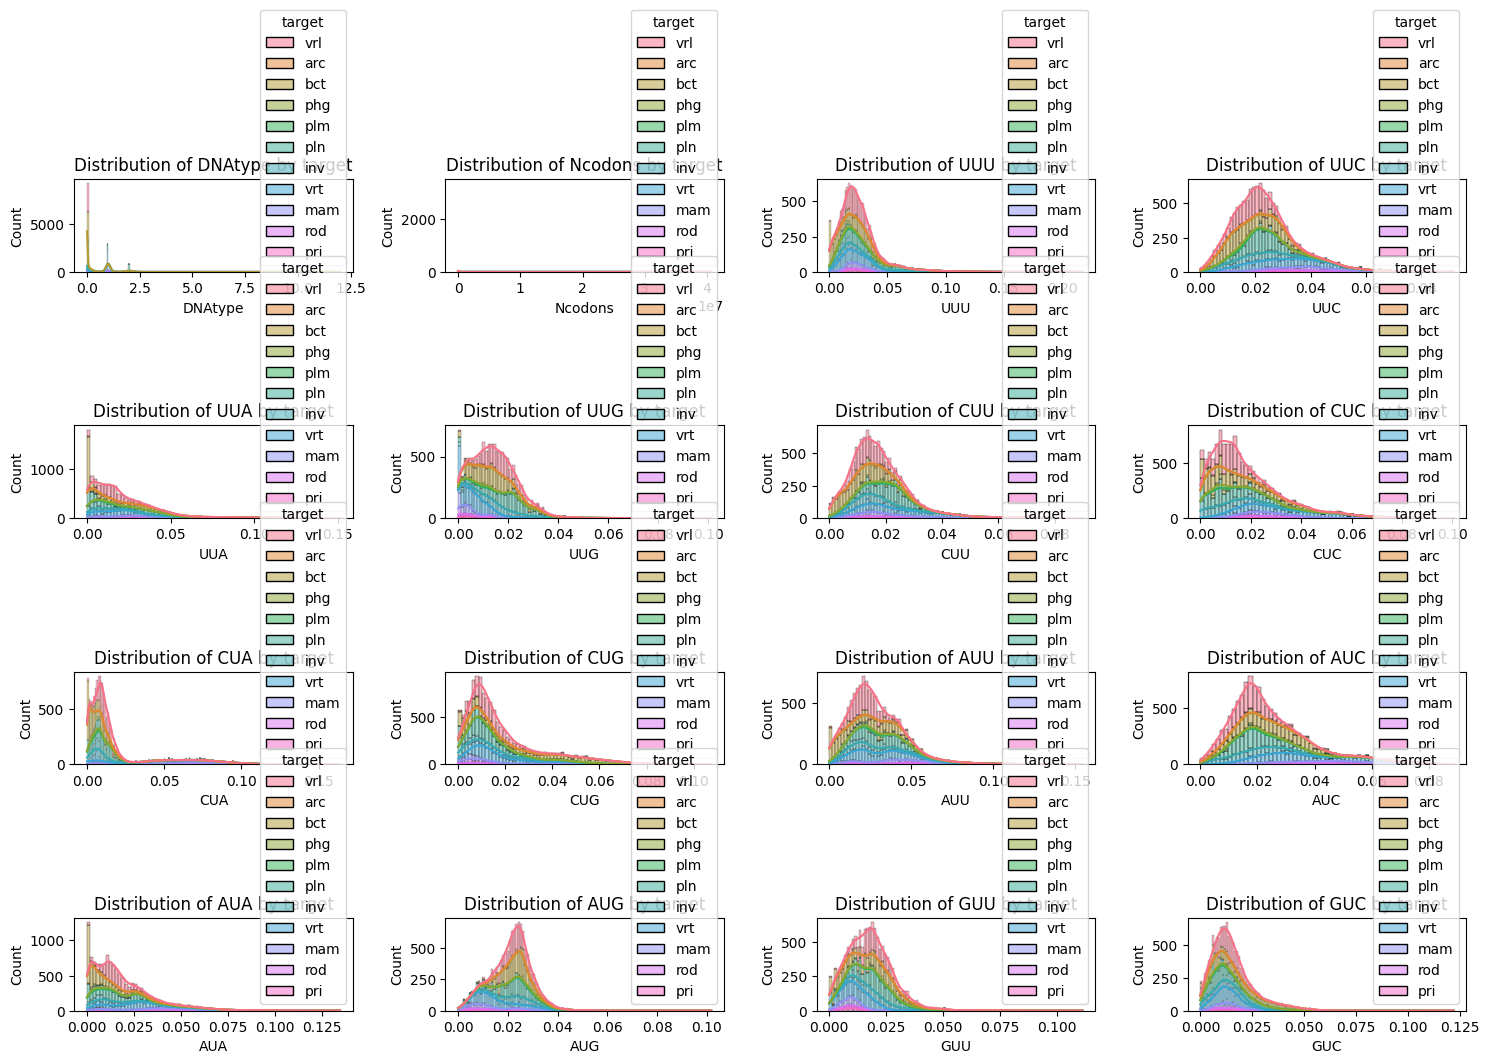

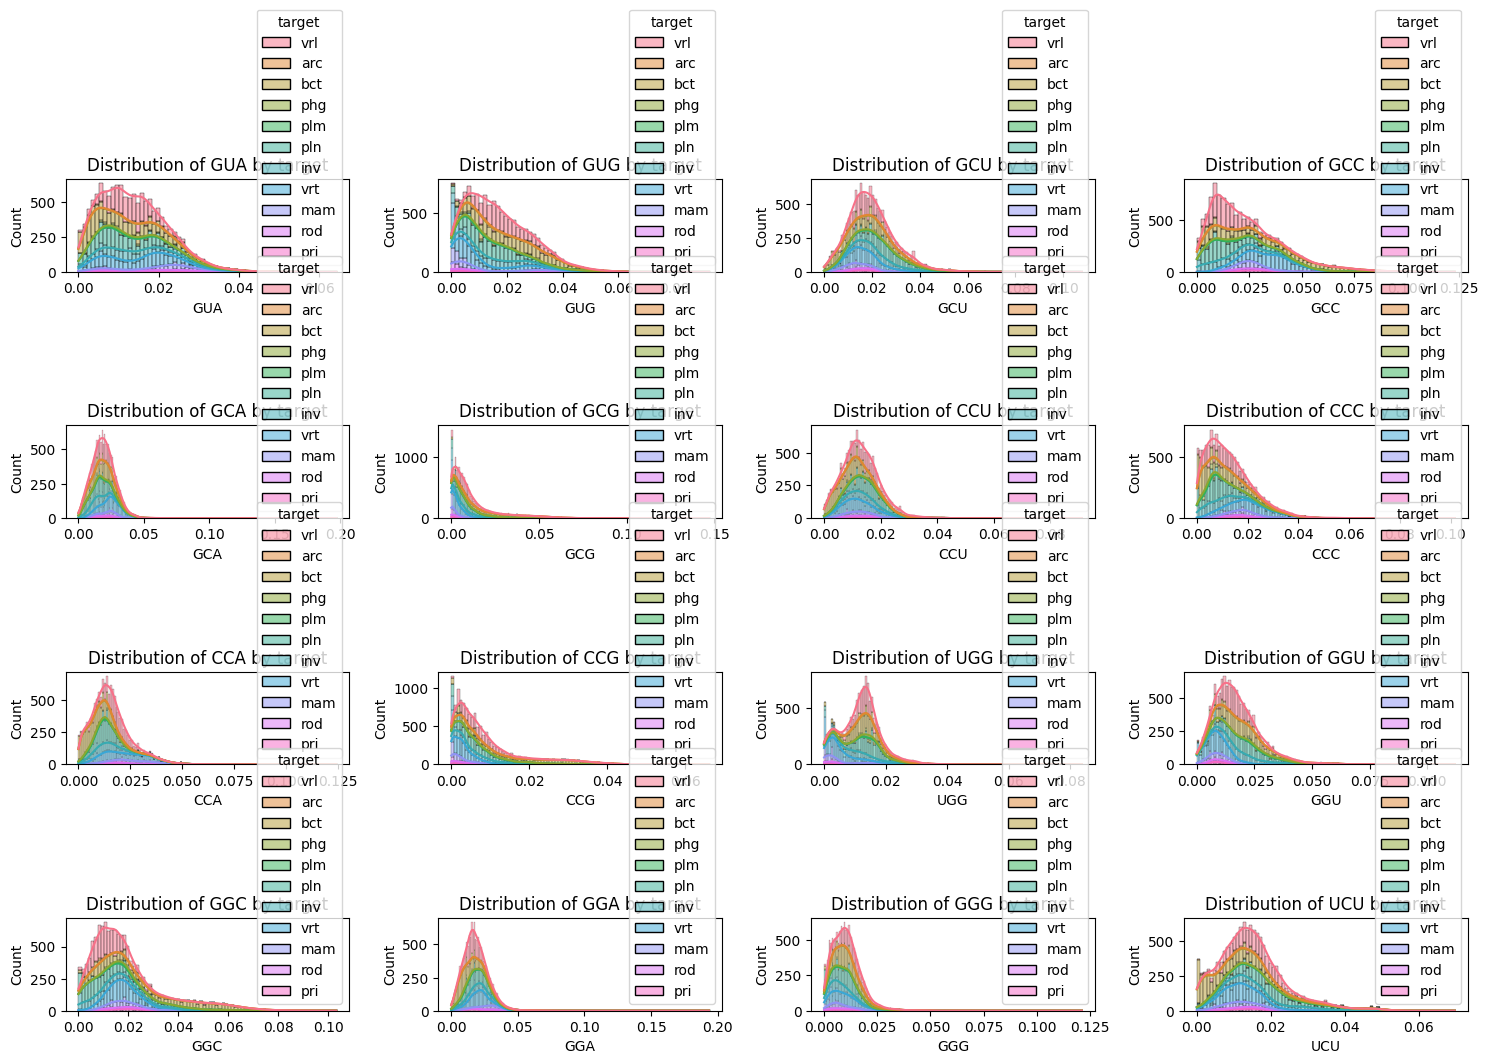

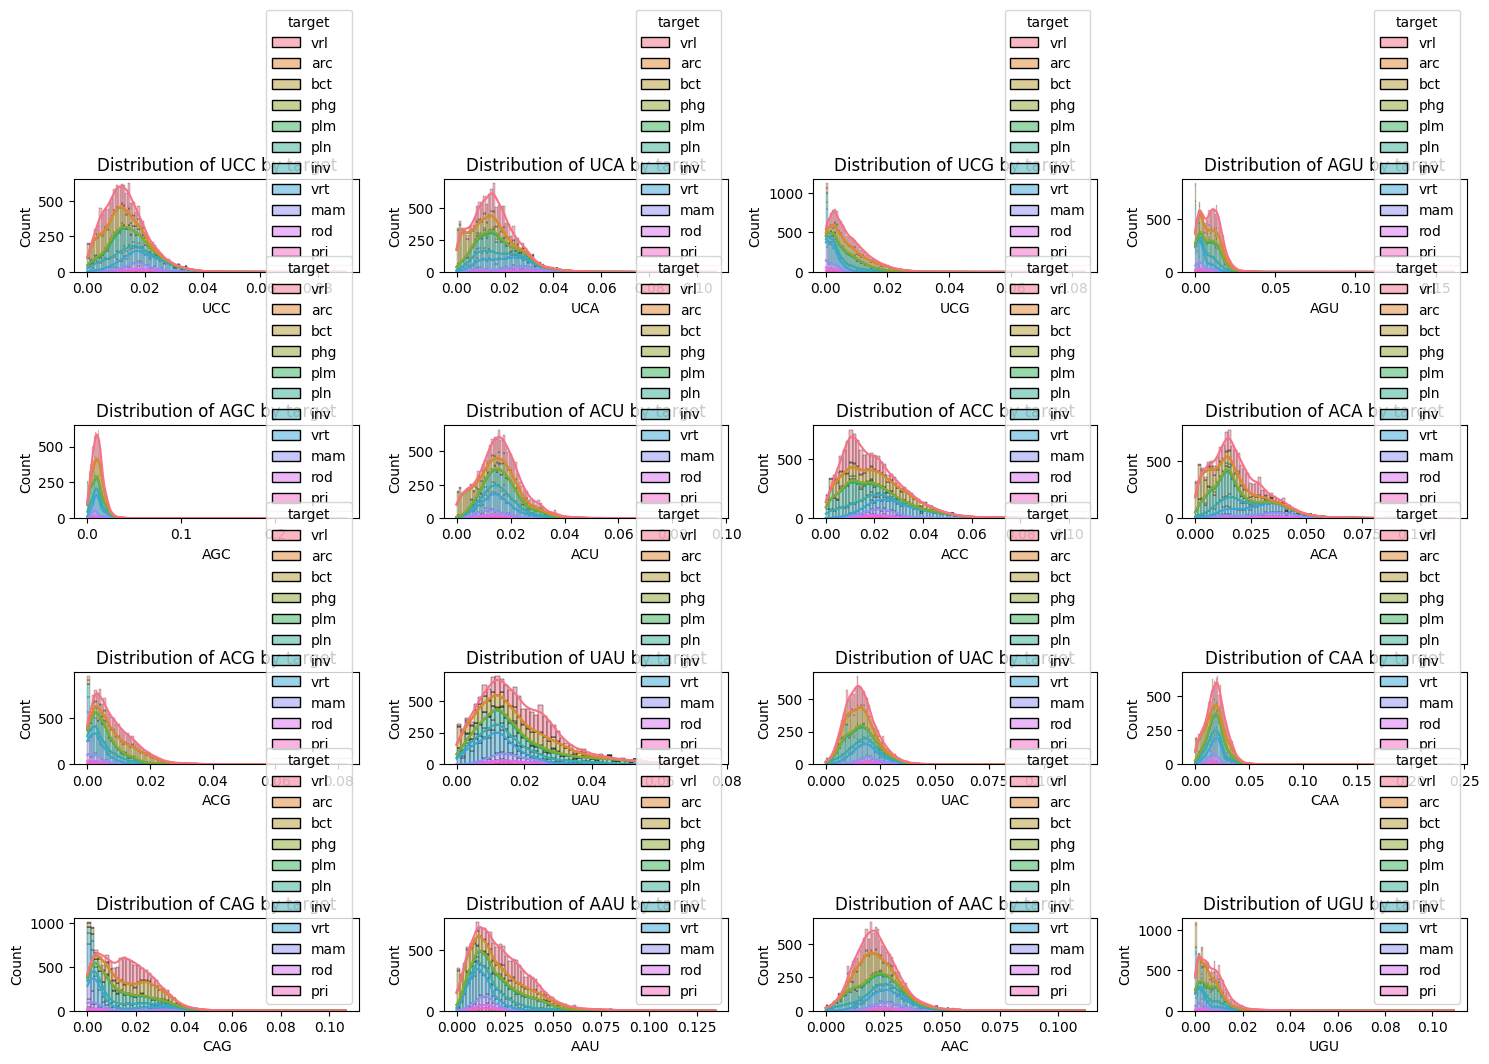

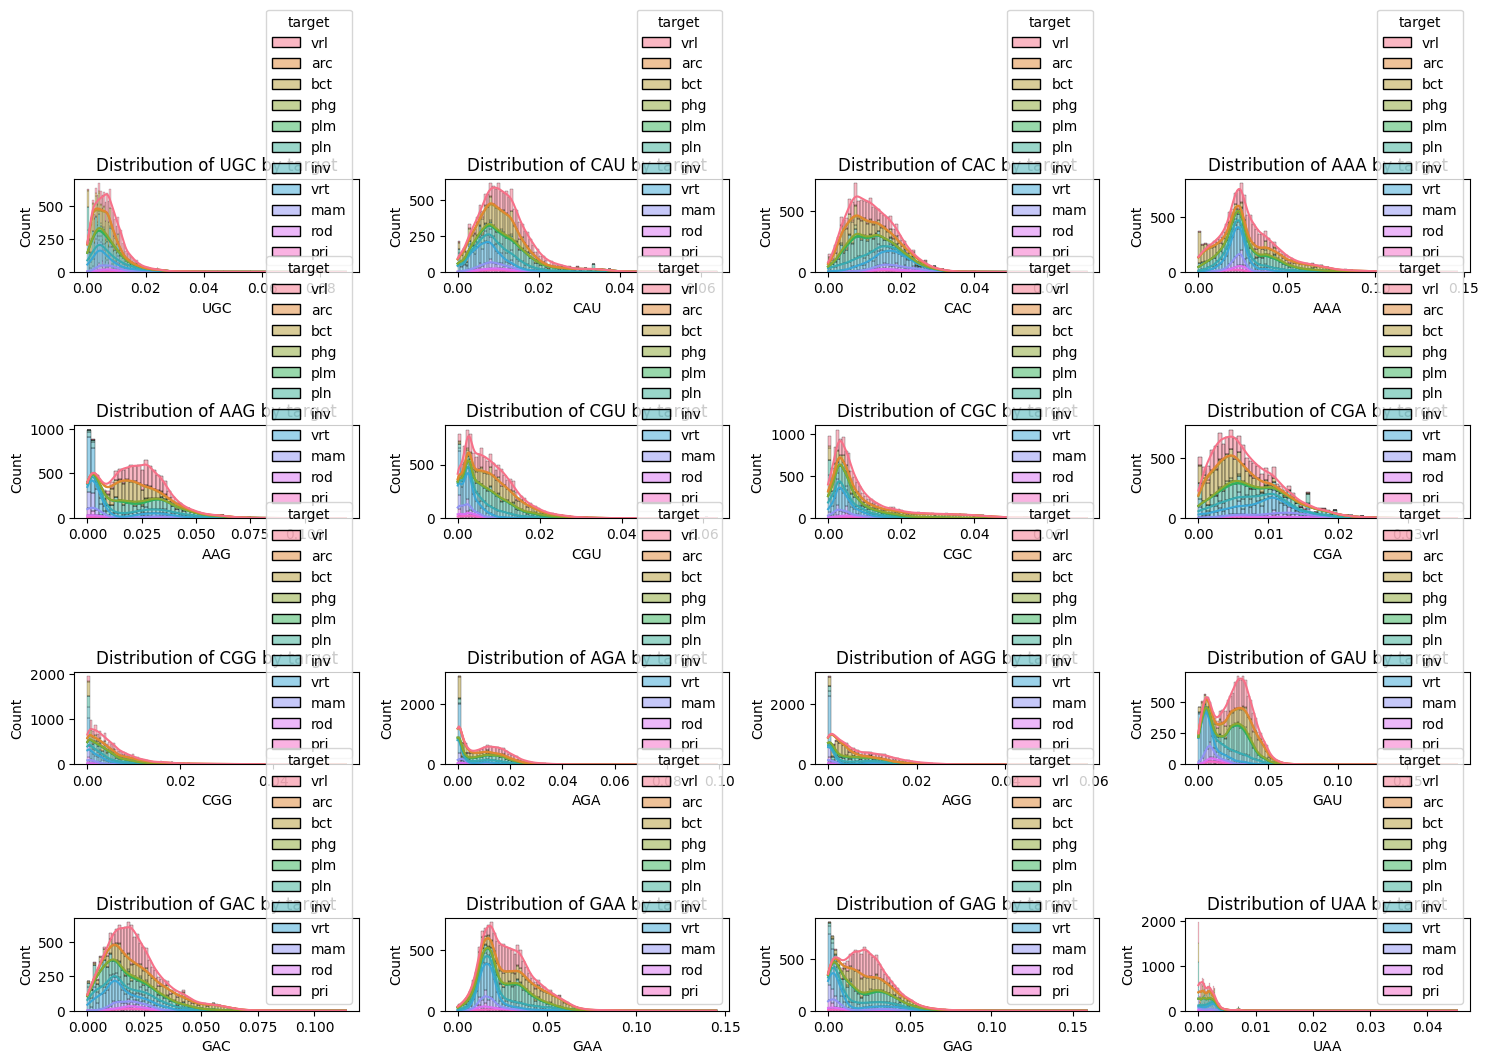

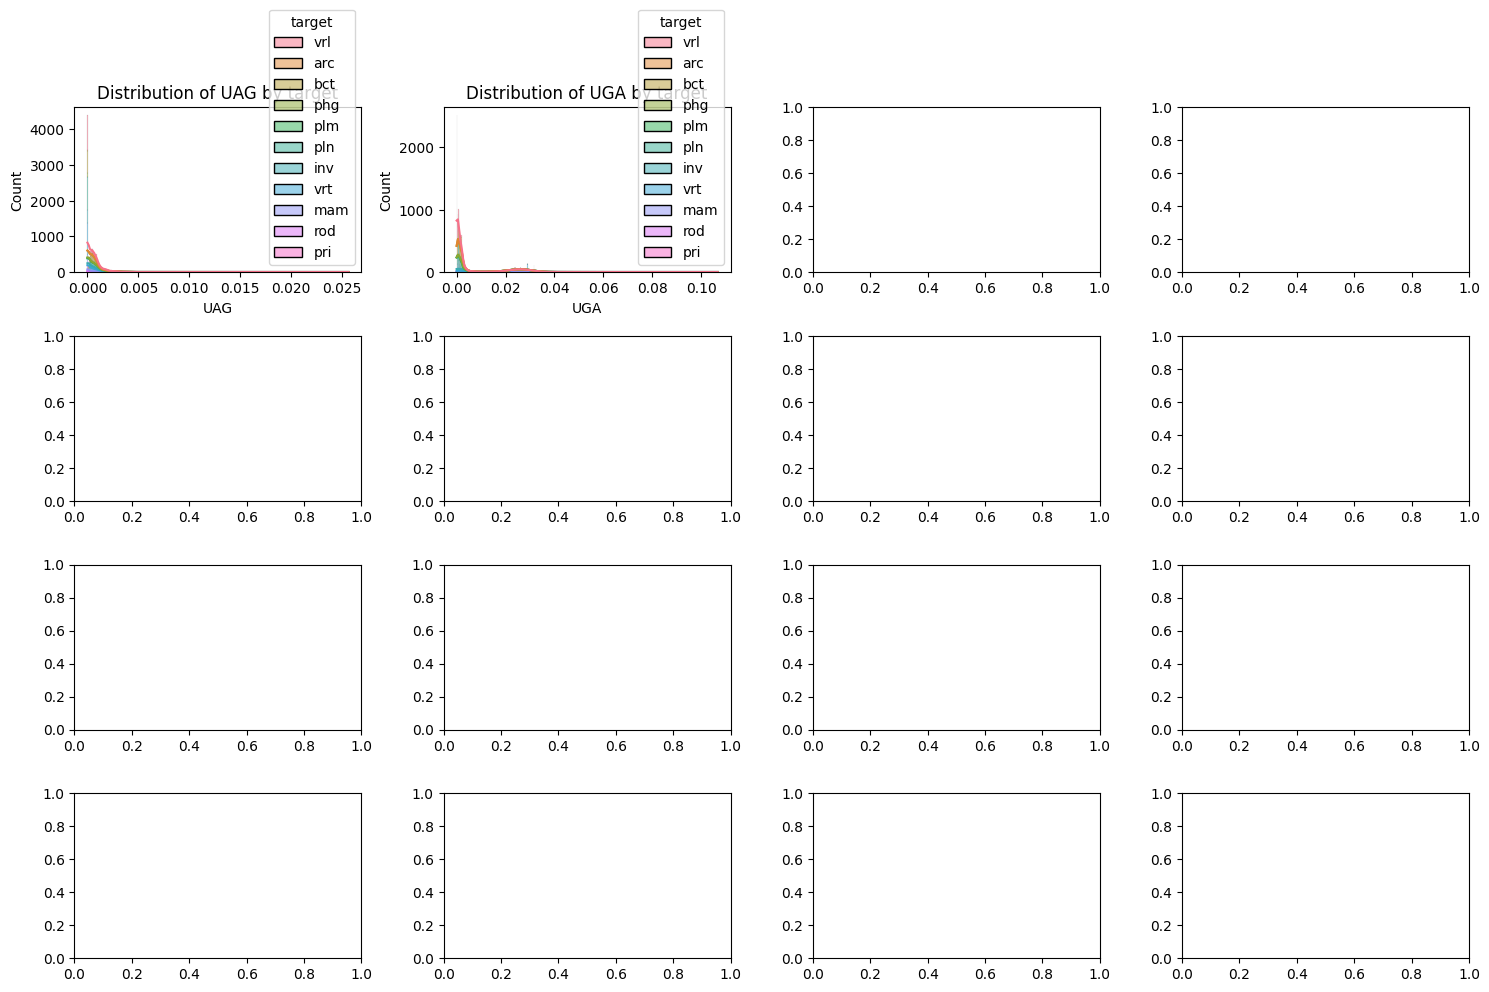

In [ ]:
df_s = pd.DataFrame(X)  
df_s['target'] = y     

def plot_histograms(df_s, target_column, variables, rows=4, cols=4):
    num_plots = rows * cols
    for i in range(0, len(variables), num_plots):
        subset_vars = variables[i:i+num_plots]
        fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=False, sharey=False)
        for var, ax in zip(subset_vars, axes.flatten()):
            sns.histplot(data=df_s, x=var, hue=target_column, multiple="stack", ax=ax, kde=True)
            ax.set_title(f"Distribution of {var} by {target_column}")
        plt.tight_layout()
        plt.show()

variables = df_s.columns[:-1]  
plot_histograms(df_s, 'target', variables, rows=4, cols=4)

### **Hipotesis de Modelos**

**XGBoost :** Los algoritmos de boosting, son efectivos para datasets con alta dimensionalidad y datos atípicos, ya que mejoran el rendimiento agregando iterativamente modelos correctivos. Estos algoritmos son altamente personalizables, lo cual es útil si el dataset presenta desequilibrios o categorías complejas, como en la variable *Kingdom*. Además, son eficaces en términos de tiempo y rendimiento en comparación con otros métodos complejos.   

**Ramdom Forest :** Este modelo es adecuado para datos con una mezcla de variables categóricas y continuas y es robusto ante outliers. Random Forest maneja datos con alta dimensionalidad y tiene un mecanismo de selección de características que ayuda a identificar cuáles son más importantes. Además, puede manejar un dataset de más de 10,000 registros sin problemas de sobreajuste, ya que emplea el promedio de múltiples árboles de decisión.  

**Support Vector Machines (SVM) :** El SVM sigue siendo adecuado, especialmente usando kernels no lineales como RBF o polynomial. Los kernels no lineales pueden ayudar a capturar patrones complejos en datos de alta dimensión y alta correlación entre variables, permitiendo una separación efectiva de clases en el espacio de codones.  

**Neural Networks (MLPC) :** Dado que las redes neuronales multicapa son muy buenas para aprender patrones complejos y detectar de buena maenra la correlación entre variables, ademas de que la gran catidad de datos que tenemos nos puede ayudar a que la red aprenda de manera más eficiente.

In [65]:
X_train.head()

,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
SpeciesID,,,,,,,,,,,,,,,,,,,,,
261996,0,69965,0.00334,0.01818,0.00230,0.00497,0.00939,0.03848,0.00154,0.01461,...,0.01659,0.04585,0.05843,0.02563,0.03689,0.04006,0.07721,0.00160,0.00300,0.00101
4224,0,5619,0.02385,0.02171,0.01442,0.02118,0.02296,0.01477,0.01068,0.00623,...,0.00445,0.01121,0.00747,0.03008,0.01691,0.02901,0.03257,0.00178,0.00018,0.00089
170824,0,1113,0.01168,0.02516,0.01168,0.01348,0.00988,0.01168,0.00719,0.02426,...,0.00898,0.01797,0.01078,0.01438,0.01797,0.03953,0.02246,0.00270,0.00000,0.00000
42858,0,3855,0.04306,0.01219,0.04877,0.01556,0.01997,0.00649,0.00908,0.00467,...,0.00208,0.01816,0.00363,0.03606,0.00882,0.04306,0.01323,0.00182,0.00156,0.00026
393597,0,2687,0.01861,0.02196,0.00856,0.01191,0.01265,0.01079,0.00819,0.01563,...,0.00484,0.01340,0.01265,0.03201,0.01675,0.02903,0.01898,0.00298,0.00149,0.00074
